# Importing Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading the Datasets

In [2]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final_project/facial-keypoints-detection_input_data_kaggle/training.csv')
train.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

In [4]:
missing_info=train.isna().sum()
missing_info

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

From the above cell, we can see that there are a lot of missing values in the dataset.

## Extracting the training Images
As the images are in last column of dataset as object dtype, We need to convert these to Numpy Array to visualize and feed it to the model. After extracting, we are also Standardizing the images to have all pixels between 0 and 1

In [5]:
def extract_images(dataset):
    images=[]
    for img in dataset.Image:
        _img = img.split()
        images.append(np.array(list(map(int,_img))).reshape(96,96))
    images = np.array(images)
    images = images/255.
    return images
train_images = extract_images(train)
print(train_images.shape)

(7049, 96, 96)


# Loading Test Dataset

In [6]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final_project/facial-keypoints-detection_input_data_kaggle/test.csv')
test.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


## Extracting Test Images
As the images are in 'Image' column of dataset as object dtype, We need to convert these to Numpy array as done previously with training dataset by using the same ***extract_images*** function. After getting the numpy array, we are also Standardizing the images to have all pixels between 0 and 1

In [7]:
test_images = extract_images(test)
print(test_images.shape)

(1783, 96, 96)


# **Visualizing the Data points on Image**
Now we will visualize all the 15 features given in training dataset on the respective images. We will plot 15 faces with respective 15 features to get a glimpse of facial landmarks

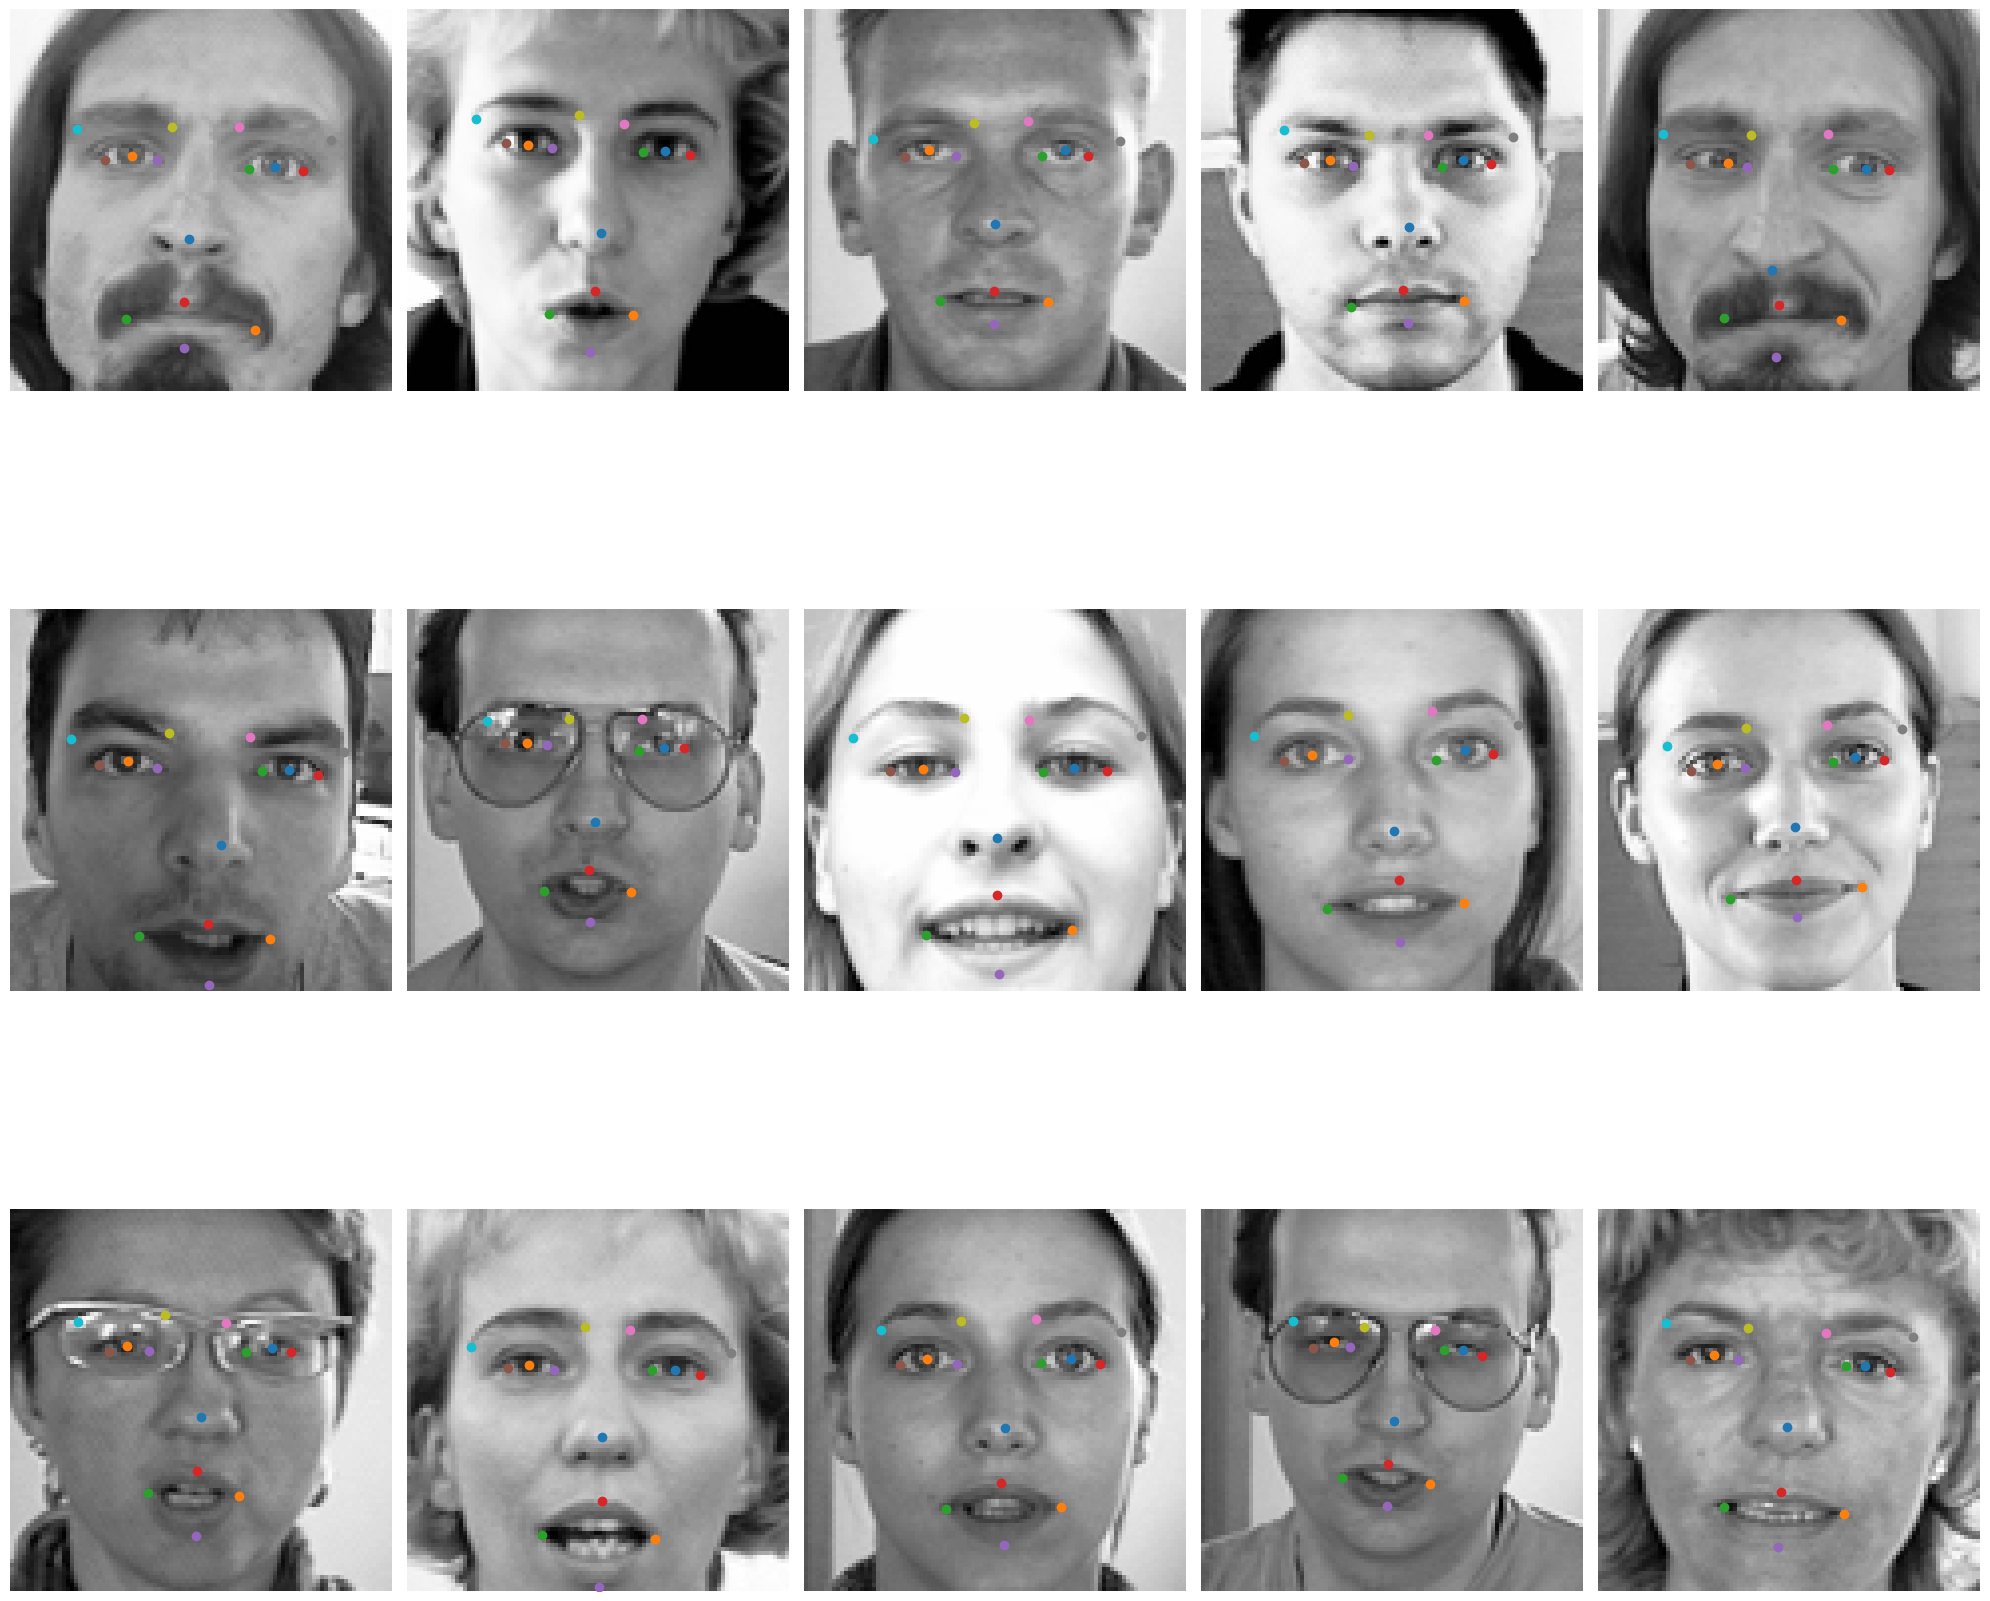

In [8]:
plt.subplots(3,5,figsize=(20,20))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(train_images[i],cmap="Greys_r")
    for j in range(0,30,2):
        plt.scatter([train.iloc[i,j]],[train.iloc[i,j+1]])
        plt.axis(False)
plt.tight_layout()
plt.show()

# Preparing Dataset for Nueral Network Model

## Preprocessing the images and getting X data
Our training images consists of Single channel Grayscale images. We need to convert it to 3 Channel (RGB) to make it compatible with Convolutional Neural Network.
We will use a ***preprocess_X*** function to get desired results

In [9]:
def preprocess_X(np_array_of_images):
    X = np_array_of_images.copy()
    X = np.expand_dims(np_array_of_images,axis=-1)
    X = np.repeat(X, 3, axis=3)
    return X

In [10]:
X = preprocess_X(train_images)
X.shape

(7049, 96, 96, 3)

## Preparing the label y data
We need to extract all the 30 feature values as labels in order to feed it to the network.

In [11]:
train_without_image=train.iloc[:,:-1]
train_without_image.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166


### **Handling Missing values :**
But we have seen, that we already have a lot of missing values in the dataset and we need to fix those before feeding it to the model.

We will fill it with the median values to fix the dataset

In [12]:
train_without_image = train_without_image.fillna(train_without_image.median(),axis=0)

In [13]:
train_without_image.isna().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
dtype: int64

Now converting these features to labels in form of Numpy array

In [14]:
def preprocess_y(dataframe_without_image):
    y=[]
    for i in range(len(dataframe_without_image)):
        _ = dataframe_without_image.iloc[i,:].values
        y.append(_)
    y=np.array(y)
    return y

In [15]:
y = preprocess_y(train_without_image)
print(y.shape)

(7049, 30)


## Splitting the dataset into Training & Validation Dataset

Splitting the dataset to check the performance of network during training

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.2,random_state=29)
print(X_train.shape,y_train.shape)
print(X_valid.shape,y_valid.shape)

(5639, 96, 96, 3) (5639, 30)
(1410, 96, 96, 3) (1410, 30)


# Building & Training the Model

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *

Custom Model 1

In [18]:
# model_1 = keras.models.Sequential([
#     InputLayer(input_shape=(96,96,3)),
#     Conv2D(64,3,padding='same',activation='relu',strides=2),
#     Conv2D(128,3,padding='same',activation='relu',strides=1),
#     MaxPooling2D(),
#     Conv2D(256,2,padding='same',activation='relu',strides=2),
#     Conv2D(512,2,padding='same',activation='relu',strides=2),
#     MaxPooling2D(),
#     Conv2D(256,2,padding='same',activation='relu',strides=1),
#     Conv2D(128,2,padding='same',activation='relu',strides=2),
#     MaxPooling2D(),
#     Conv2D(300,3,padding='same',activation='relu',strides=2),
#     GlobalAveragePooling2D(),
# #     Dense(90,activation='selu'),
# #     BatchNormalization(),
# #     Dropout(0.5),
# #     Dense(45,activation='selu'),
# #     Dropout(0.3),
#     Dense(30)
# #     Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 1)),
# #     MaxPooling2D((2, 2)),
# #     Conv2D(64, (3, 3), activation='relu'),
# #     MaxPooling2D((2, 2)),
# #     Conv2D(128, (3, 3), activation='relu'),
# #     MaxPooling2D((2, 2)),
# #     Conv2D(256, (3, 3), activation='relu'),
# #     Flatten(),
# #     Dense(256, activation='relu'),
# #     Dense(30)  # Assuming 30 facial landmarks
# ])

## Defining Custom Loss Function RootMeanSquaredError(RMSE)
Defining RMSE Loss for the model

In [19]:
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

In [ ]:
# model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4), loss=rmse)
# history = model.fit(X_train,y_train,epochs=50,
#                     callbacks=[keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)],
#                    validation_data=(X_valid,y_valid))

In [ ]:
# model.save('My_model.h5')

In [ ]:
# resnet50 = keras.applications.ResNet50(include_top=False,input_shape=(96,96,3))

In [ ]:
# for layer in resnet50.layers:
#     layer.trainable=False

In [ ]:
# model_2 = keras.models.Sequential([
#     resnet50,
#     GlobalAveragePooling2D(),
#     Dense(1024,activation='selu'),
# #     BatchNormalization(),
#     Dense(300,activation='selu'),
#     Dense(150,activation='relu'),
# #     Dropout(0.3),
#     Dense(30)
# ])

In [ ]:
# model_2.compile(optimizer=keras.optimizers.Adam(), loss=rmse)
# history_2 = model_2.fit(X_train,y_train,epochs=50,
#                     callbacks=[keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)],
#                    validation_data=(X_valid,y_valid))

In [ ]:
model_5 = keras.models.Sequential([
    # InputLayer(input_shape=(96,96,3)),
    # RandomBrightness(0.2,input_shape=(96,96,3),seed=29),
    Conv2D(64,2,activation='relu',padding='same',input_shape=(96,96,3)),
    MaxPool2D(),
#     Dropout(0.2),
    Conv2D(128,2,activation='relu',padding='same'),
    AvgPool2D(),
#     Dropout(0.2),
    Conv2D(256,2,activation='relu',padding='same'),
    AvgPool2D(),
#     Dropout(0.2),
    Conv2D(512,2,activation='relu',padding='same'),
    MaxPool2D(),
    Conv2D(1024,2,activation='relu',padding='same'),
    MaxPool2D(),
    Conv2D(2048,2,activation='relu',padding='same'),
    MaxPool2D(),
#     Dropout(0.2),
#     GlobalPoolingAverage2D(),
    Flatten(),
    Dense(256,activation='selu'),
    Dense(128,activation='selu'),
    Dense(512,activation='selu'),
    Dense(1024,activation='selu'),
    Dense(30)
])

In [ ]:
model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 64)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 48, 48, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 128)       32896     
                                                                 
 average_pooling2d (Average  (None, 24, 24, 128)       0         
 Pooling2D)                                                      
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 256)       131328    
                                                                 
 average_pooling2d_1 (Avera  (None, 12, 12, 256)       0

In [ ]:
model_5.compile(optimizer=keras.optimizers.Adam(), loss=rmse)
history_5 = model_5.fit(X_train,y_train,epochs=50,
                    callbacks=[keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)],
                   validation_data=(X_valid,y_valid))

Epoch 1/50
 43/177 [======>.......................] - ETA: 9:47 - loss: 9.3878

KeyboardInterrupt: 

In [ ]:
pd.DataFrame(history_5.history).plot()

In [ ]:
# model_5.save('model_4.h5')
model_4 = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Final_project/Models/model_4.h5',custom_objects={'rmse':rmse})

In [ ]:
model_4.ev

In [ ]:
# Assuming history is your model's history object
history_dict = history_5.history

# Convert the history dictionary to a DataFrame
history_df = pd.DataFrame(history_dict)

# Save the DataFrame to a CSV file
history_df.to_csv('history.csv', index=False)

In [ ]:
model_4.evaluate(X_valid,y_valid)

45/45 [==============================] - 24s 515ms/step - loss: 0.9653


0.9653036594390869

# Submission

In [ ]:
X_test = preprocess_X(test_images)
X_test.shape

(1783, 96, 96, 3)

In [ ]:
y_preds = model_4.predict(X_test)
y_preds.shape

56/56 [==============================] - 3s 17ms/step


(1783, 30)

In [ ]:
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final_project/facial-keypoints-detection_input_data_kaggle/IdLookupTable.csv')
sample_submission

In [ ]:
feature_names = list(sample_submission['FeatureName'])
image_ids = list(sample_submission['ImageId']-1)
row_ids = list(sample_submission['RowId'])

feature_list = []
for feature in feature_names:
#     print(feature_names.index(feature))
    feature_list.append(feature_names.index(feature))

In [ ]:
predictions = []
for x,y in zip(image_ids, feature_list):
    predictions.append(y_preds[x][y])
predictions[:10]

In [ ]:
row_ids = pd.Series(row_ids, name = 'RowId')
locations = pd.Series(predictions, name = 'Location')
# locations = locations.clip(0.0,96.0)
submission_result = pd.concat([row_ids,locations],axis = 1)
submission_result.to_csv('submission_result.csv',index = False)

# Predicted Landmarks Visualization

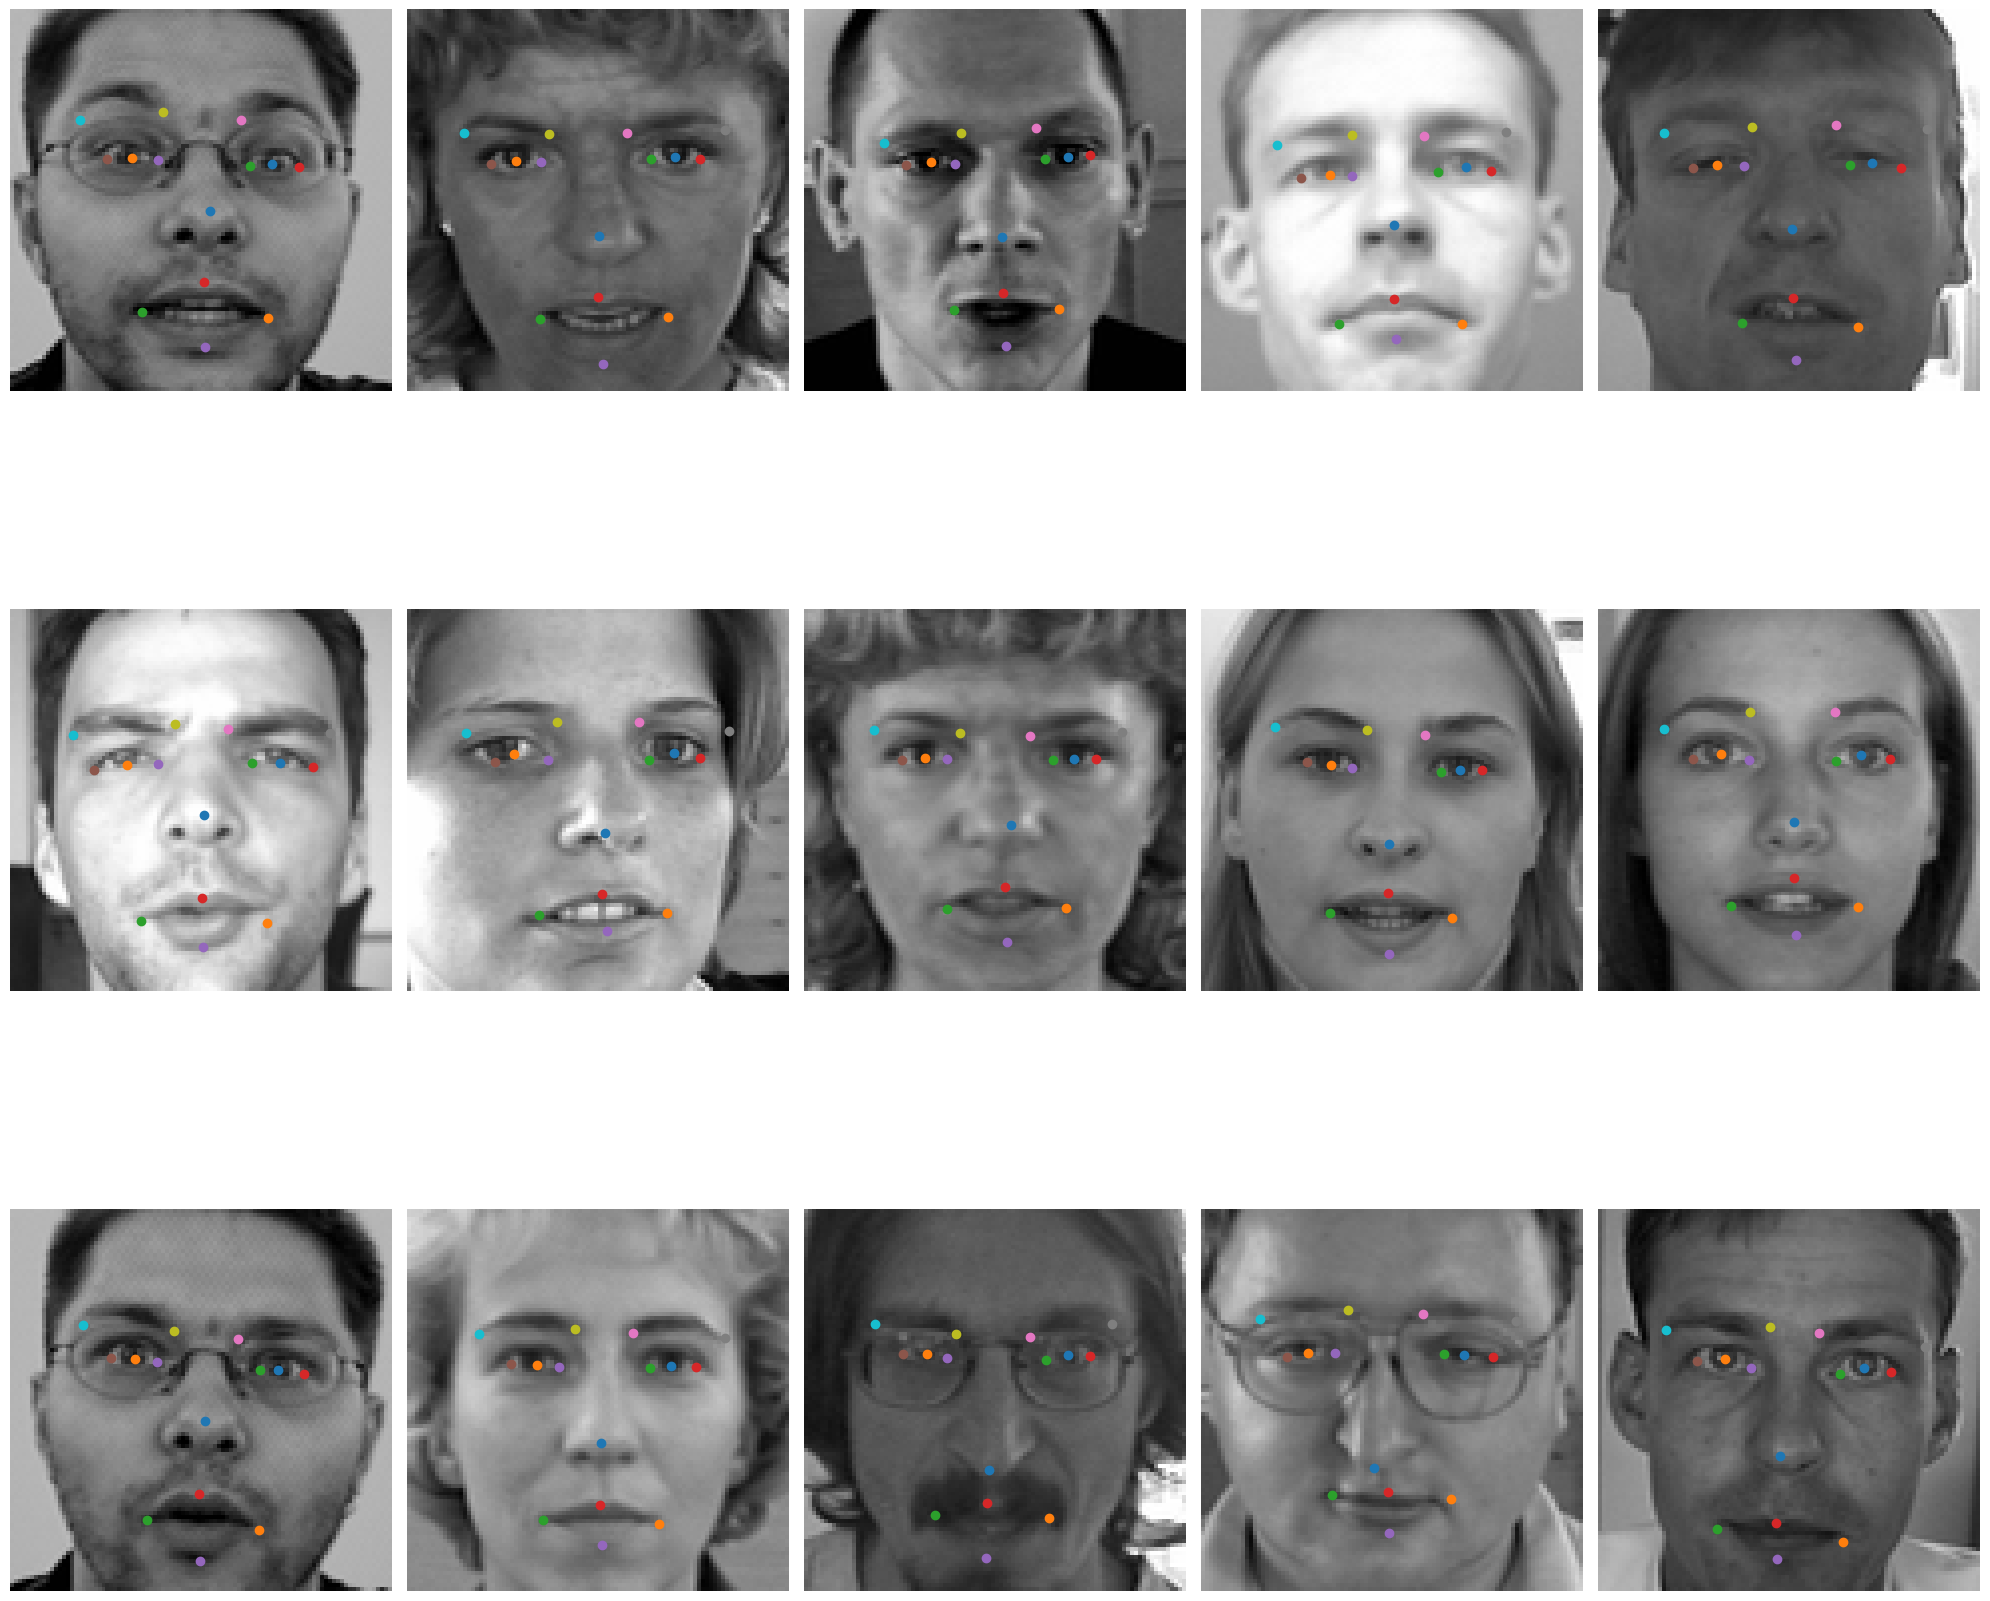

In [ ]:
plt.subplots(3,5,figsize=(20,20))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(X_test[i],cmap="Greys_r")
    for j in range(0,30,2):
        plt.scatter([y_preds[i,j]],[y_preds[i,j+1]])
        plt.axis(False)
plt.tight_layout()
plt.show()

In [ ]:
y_preds.shape

(1783, 30)

# Loading Saved model_4
Loading again model_4 for checking to save time for training again and testing webcam features

In [20]:
model_4 = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Final_project/Models/model_4.h5',custom_objects={'rmse':rmse})
# model_4.summary()

In [ ]:
model_4.evaluate(X_valid,y_valid)

45/45 [==============================] - 33s 722ms/step - loss: 0.9653


0.9653036594390869

In [ ]:
y_pred_1 = model_4.predict(X_test)

NameError: name 'X_test' is not defined

In [ ]:
y_pred_1.shape

(1783, 30)

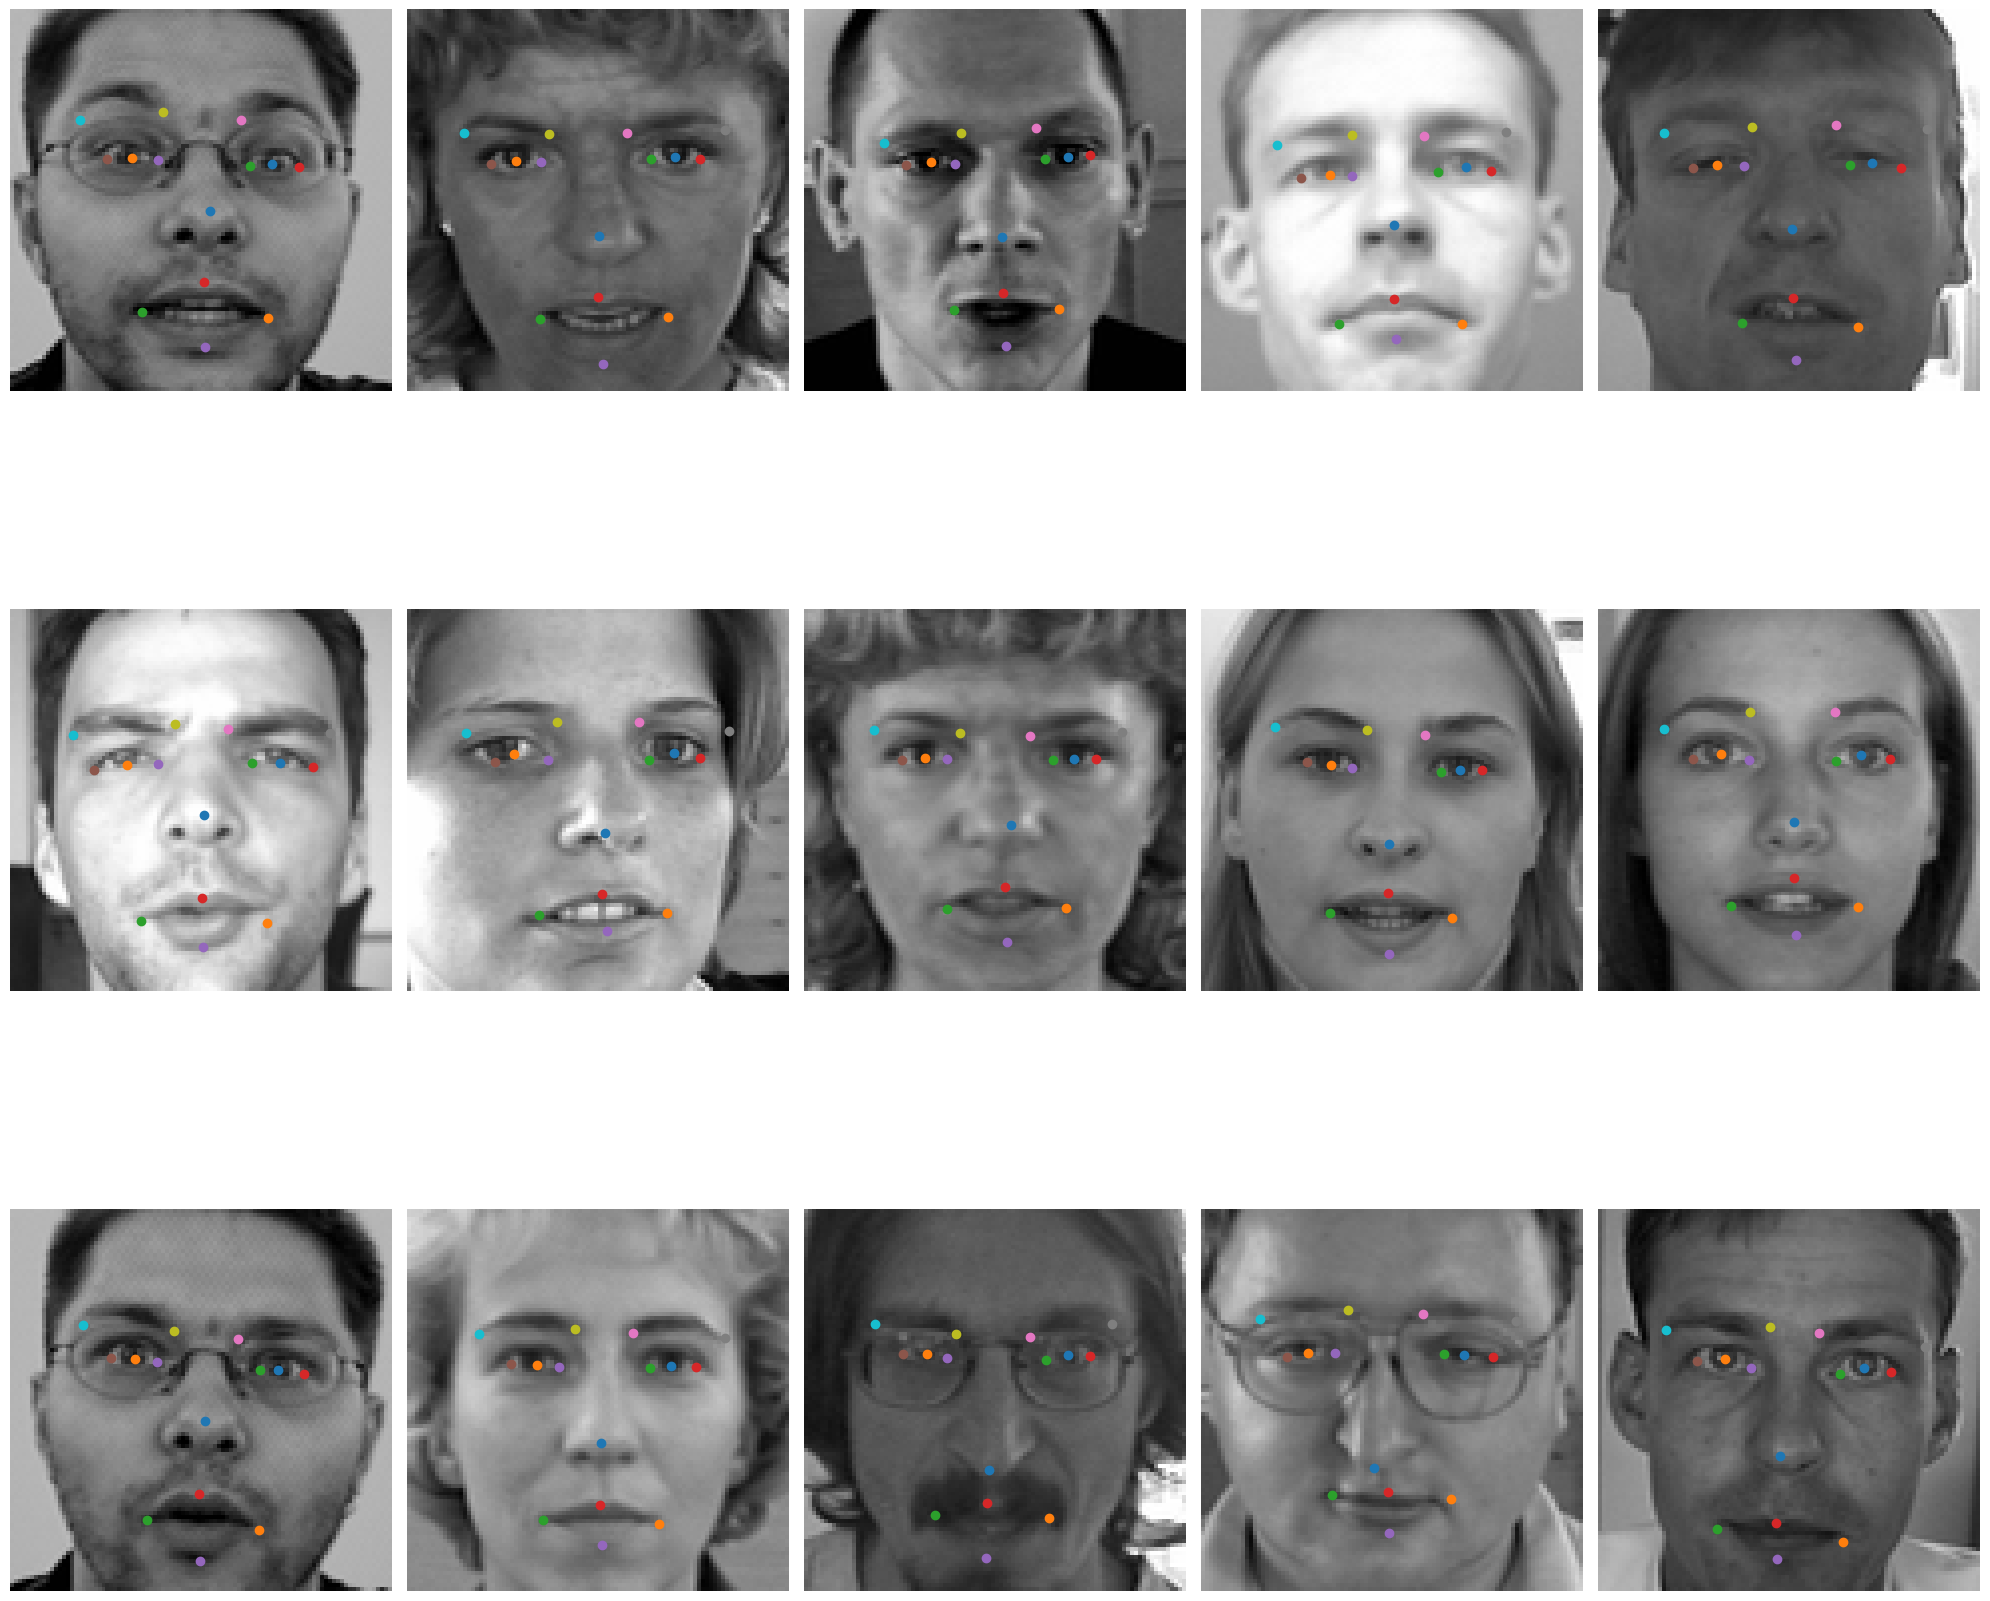

In [ ]:
plt.subplots(3,5,figsize=(20,20))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(X_test[i],cmap="Greys_r")
    for j in range(0,30,2):
        plt.scatter([y_pred_1[i,j]],[y_pred_1[i,j+1]])
        plt.axis(False)
plt.tight_layout()
plt.show()

# Trying to fix missing values using model_4

In [ ]:
y_left_eye_x_y = list((train.left_eye_center_x.dropna(),train.left_eye_center_y.dropna()))
len(y_left_eye_x_y)

2

In [ ]:
len(y_left_eye_x_y[0]),len(y_left_eye_x_y[1])

(7039, 7039)

## Creating a list containing feature wise null values index

In [ ]:
feature_wise_null_values=[]
col = list(train.columns)
for i in range(0,30,2):
    nan_indices = train.index[train[col[i]].isnull() & train[col[i+1]].isnull()].tolist()
    feature_wise_null_values.append([nan_indices,col[i],col[i+1]])
    # Cross verifying by checking shape of dropped values
    if train[col[i]].dropna().shape != train[col[i+1]].dropna().shape:
        print('problem here', col[i])

In [ ]:
feature_wise_null_values[0]

[[1687, 1834, 1866, 1938, 2100, 2137, 2153, 2175, 2186, 2239],
 'left_eye_center_x',
 'left_eye_center_y']

## Fixing left_eye_center_x', 'left_eye_center_y by predicting it from model 4



In [ ]:
model__1 = tf.keras.models.clone_model(model_4)

In [ ]:
model__1.set_weights(model_4.get_weights())

#Trying a facial landmark on camera image

In [ ]:
import cv2
import numpy as np
cap = cv2.VideoCapture(1)  # 0 for default webcam

In [ ]:
ret, frame = cap.read()

In [ ]:
print(frame)

None


# Trying VGG Model

In [ ]:
vgg_net = keras.applications.VGG16(include_top=False,input_shape=(96,96,3))
vgg_net.trainable=False
# vgg_net.summary()

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
model_vgg = keras.models.Sequential([
    vgg_net,
    Flatten(),
    Dense(256,activation='selu'),
    Dense(128,activation='selu'),
    Dense(512,activation='selu'),
    Dense(1024,activation='selu'),
    Dense(30)
])
model_vgg.compile(optimizer='adam',loss=rmse)
history_vgg_model = model_vgg.fit(X_train,y_train,epochs=100,
                    callbacks=[keras.callbacks.EarlyStopping(patience=8, restore_best_weights=True)],
                   validation_data=(X_valid,y_valid))

Epoch 1/100
177/177 [==============================] - 13s 51ms/step - loss: 4.5307 - val_loss: 2.5836
Epoch 2/100
177/177 [==============================] - 6s 34ms/step - loss: 2.4204 - val_loss: 2.7886
Epoch 3/100
177/177 [==============================] - 6s 35ms/step - loss: 2.2883 - val_loss: 2.2741
Epoch 4/100
177/177 [==============================] - 6s 35ms/step - loss: 2.0836 - val_loss: 2.3935
Epoch 5/100
177/177 [==============================] - 6s 35ms/step - loss: 1.9750 - val_loss: 2.2748
Epoch 6/100
177/177 [==============================] - 7s 37ms/step - loss: 1.8771 - val_loss: 2.3925
Epoch 7/100
177/177 [==============================] - 6s 36ms/step - loss: 1.8195 - val_loss: 2.1603
Epoch 8/100
177/177 [==============================] - 6s 36ms/step - loss: 1.7041 - val_loss: 2.1497
Epoch 9/100
177/177 [==============================] - 6s 35ms/step - loss: 1.6283 - val_loss: 2.2152
Epoch 10/100
177/177 [==============================] - 6s 36ms/step - loss: 1.57

In [ ]:
history_vgg_model_1 = model_vgg.fit(X_train,y_train,epochs=100,
                    callbacks=[keras.callbacks.EarlyStopping(patience=8, restore_best_weights=True)],
                   validation_data=(X_valid,y_valid))

Epoch 1/100
177/177 [==============================] - 7s 40ms/step - loss: 1.0781 - val_loss: 2.0877
Epoch 2/100
177/177 [==============================] - 6s 35ms/step - loss: 1.0970 - val_loss: 2.1012
Epoch 3/100
177/177 [==============================] - 6s 36ms/step - loss: 1.0284 - val_loss: 2.0631
Epoch 4/100
177/177 [==============================] - 6s 35ms/step - loss: 1.0113 - val_loss: 2.0214
Epoch 5/100
177/177 [==============================] - 6s 36ms/step - loss: 0.9829 - val_loss: 2.0427
Epoch 6/100
177/177 [==============================] - 6s 36ms/step - loss: 0.9726 - val_loss: 2.0085
Epoch 7/100
177/177 [==============================] - 6s 36ms/step - loss: 0.9596 - val_loss: 1.9979
Epoch 8/100
177/177 [==============================] - 6s 35ms/step - loss: 0.9567 - val_loss: 2.0666
Epoch 9/100
177/177 [==============================] - 6s 36ms/step - loss: 0.9268 - val_loss: 2.0277
Epoch 10/100
177/177 [==============================] - 6s 36ms/step - loss: 0.912

# Trying MobileNet Model

In [ ]:
mobilenet = keras.applications.MobileNetV3Large(include_top=False,input_shape=(96,96,3))
mobilenet.trainable=False
# mobilenet.summary()

12683000/12683000 [==============================] - 0s 0us/step


In [ ]:
mobilenet_model = keras.models.Sequential([
    mobilenet,
    GlobalAveragePooling2D(),
    Dense(30)
])
mobilenet_model.compile(optimizer='adam',loss=rmse)
history_mobilenet = mobilenet_model.fit(X_train,y_train,epochs=50,
                    callbacks=[keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)],
                   validation_data=(X_valid,y_valid))

Epoch 1/50
177/177 [==============================] - 13s 39ms/step - loss: 43.6613 - val_loss: 36.3190
Epoch 2/50
177/177 [==============================] - 3s 15ms/step - loss: 29.5887 - val_loss: 23.1492
Epoch 3/50
177/177 [==============================] - 5s 29ms/step - loss: 17.4354 - val_loss: 12.0522
Epoch 4/50
177/177 [==============================] - 3s 17ms/step - loss: 7.5355 - val_loss: 3.8449
Epoch 5/50
177/177 [==============================] - 3s 19ms/step - loss: 2.9382 - val_loss: 2.8007
Epoch 6/50
177/177 [==============================] - 3s 15ms/step - loss: 2.7545 - val_loss: 2.7945
Epoch 7/50
177/177 [==============================] - 3s 17ms/step - loss: 2.7511 - val_loss: 2.7874
Epoch 8/50
177/177 [==============================] - 2s 13ms/step - loss: 2.7407 - val_loss: 2.7821
Epoch 9/50
177/177 [==============================] - 2s 13ms/step - loss: 2.7389 - val_loss: 2.7755
Epoch 10/50
177/177 [==============================] - 2s 13ms/step - loss: 2.7282 -

# Trying EfficientNet

In [ ]:
efficient_net = keras.applications.EfficientNetV2L(include_top=False,input_shape=(96,96,3))
efficient_net.trainable=False

473176280/473176280 [==============================] - 11s 0us/step


In [ ]:
efficient_net_model = keras.models.Sequential([
    efficient_net,
    GlobalAveragePooling2D(),
    Dense(30)
])
efficient_net_model.compile(optimizer='adam',loss=rmse)
history_efficient_net = efficient_net_model.fit(X_train,y_train,epochs=50,
                    callbacks=[keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)],
                   validation_data=(X_valid,y_valid))

Epoch 1/50
177/177 [==============================] - 62s 178ms/step - loss: 34.4258 - val_loss: 15.6901
Epoch 2/50
177/177 [==============================] - 21s 119ms/step - loss: 12.8467 - val_loss: 3.9284
Epoch 3/50
177/177 [==============================] - 21s 119ms/step - loss: 9.0954 - val_loss: 4.3426
Epoch 4/50
177/177 [==============================] - 20s 112ms/step - loss: 8.7175 - val_loss: 3.9921
Epoch 5/50
177/177 [==============================] - 21s 117ms/step - loss: 8.1352 - val_loss: 3.7701
Epoch 6/50
177/177 [==============================] - 21s 121ms/step - loss: 7.2807 - val_loss: 3.6825
Epoch 7/50
177/177 [==============================] - 21s 118ms/step - loss: 6.5046 - val_loss: 3.5849
Epoch 8/50
177/177 [==============================] - 21s 118ms/step - loss: 6.0396 - val_loss: 3.5861
Epoch 9/50
177/177 [==============================] - 21s 119ms/step - loss: 6.0190 - val_loss: 3.4210
Epoch 10/50
177/177 [==============================] - 20s 114ms/step 

In [ ]:
history_efficient_net_1 = efficient_net_model.fit(X_train,y_train,epochs=50,
                    callbacks=[keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)],
                   validation_data=(X_valid,y_valid))

Epoch 1/50
177/177 [==============================] - 22s 125ms/step - loss: 4.2142 - val_loss: 3.3283
Epoch 2/50
177/177 [==============================] - 21s 120ms/step - loss: 4.1098 - val_loss: 3.3200
Epoch 3/50
177/177 [==============================] - 21s 121ms/step - loss: 4.0160 - val_loss: 3.1799
Epoch 4/50
177/177 [==============================] - 21s 117ms/step - loss: 4.0103 - val_loss: 3.2934
Epoch 5/50
177/177 [==============================] - 20s 115ms/step - loss: 3.6798 - val_loss: 3.4002
Epoch 6/50
177/177 [==============================] - 21s 118ms/step - loss: 3.8628 - val_loss: 3.1632
Epoch 7/50
177/177 [==============================] - 20s 115ms/step - loss: 4.1041 - val_loss: 3.2156
Epoch 8/50
177/177 [==============================] - 20s 114ms/step - loss: 3.6277 - val_loss: 3.2805
Epoch 9/50
177/177 [==============================] - 20s 114ms/step - loss: 3.4604 - val_loss: 3.4361
Epoch 10/50
177/177 [==============================] - 21s 117ms/step - l